In [2]:
'''

About this file

These variables collectively provide insights 
into the exercise routine, calorie expenditure, weight-related measures,
demographic information, and additional factors that may influence
exercise and fitness outcomes.

'''

# from https://www.kaggle.com/datasets/aakashjoshi123/exercise-and-fitness-metrics-dataset


'\n\nAbout this file\n\nThese variables collectively provide insights \ninto the exercise routine, calorie expenditure, weight-related measures,\ndemographic information, and additional factors that may influence\nexercise and fitness outcomes.\n\n'

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import plotly.express as px



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# I'm gonna store the dataframe into df
df = pd.read_csv('data/fitness.csv')
# See whats inside
df.head()


ID     Exercise  Calories Burn  Dream Weight  Actual Weight  Age  Gender  \
0   1   Exercise 2     286.959851     91.892531      96.301115   45    Male   
1   2   Exercise 7     343.453036     64.165097      61.104668   25    Male   
2   3   Exercise 4     261.223465     70.846224      71.766724   20    Male   
3   4   Exercise 5     127.183858     79.477008      82.984456   33    Male   
4   5  Exercise 10     416.318374     89.960226      85.643174   29  Female   

   Duration  Heart Rate        BMI Weather Conditions  Exercise Intensity  
0        37         170  29.426275              Rainy                   5  
1        43         142  21.286346              Rainy                   5  
2        20         148  27.899592             Cloudy                   4  
3        39         170  33.729552              Sunny                  10  
4        34         118  23.286113             Cloudy                   3

In [5]:
df.max()

ID                          3864
Exercise              Exercise 9
Calories Burn         499.859262
Dream Weight           99.985355
Actual Weight           104.3096
Age                           60
Gender                      Male
Duration                      60
Heart Rate                   180
BMI                    34.996639
Weather Conditions         Sunny
Exercise Intensity            10
dtype: object

In [6]:
df.min()

ID                             1
Exercise              Exercise 1
Calories Burn         100.009403
Dream Weight           50.001984
Actual Weight          45.783747
Age                           18
Gender                    Female
Duration                      20
Heart Rate                   100
BMI                    18.500014
Weather Conditions        Cloudy
Exercise Intensity             1
dtype: object

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   object 
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   object 
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB


<Axes: ylabel='Age'>

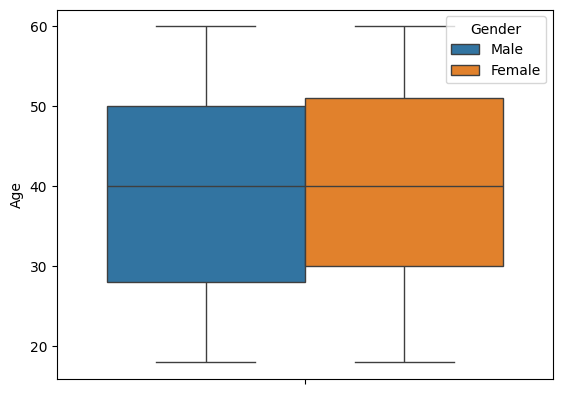

In [8]:
sns.boxplot(df, y='Age', hue='Gender')



<Axes: ylabel='BMI'>

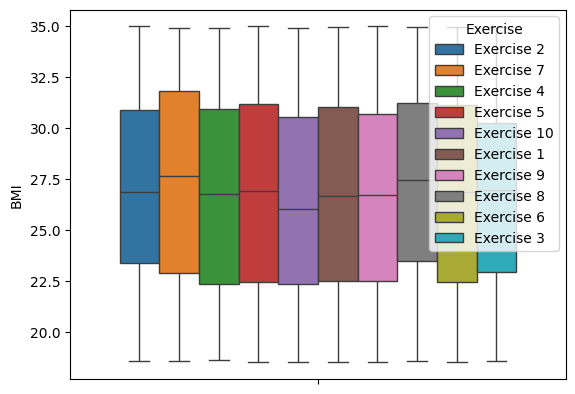

In [9]:
sns.boxplot(df, y='BMI', hue='Exercise')

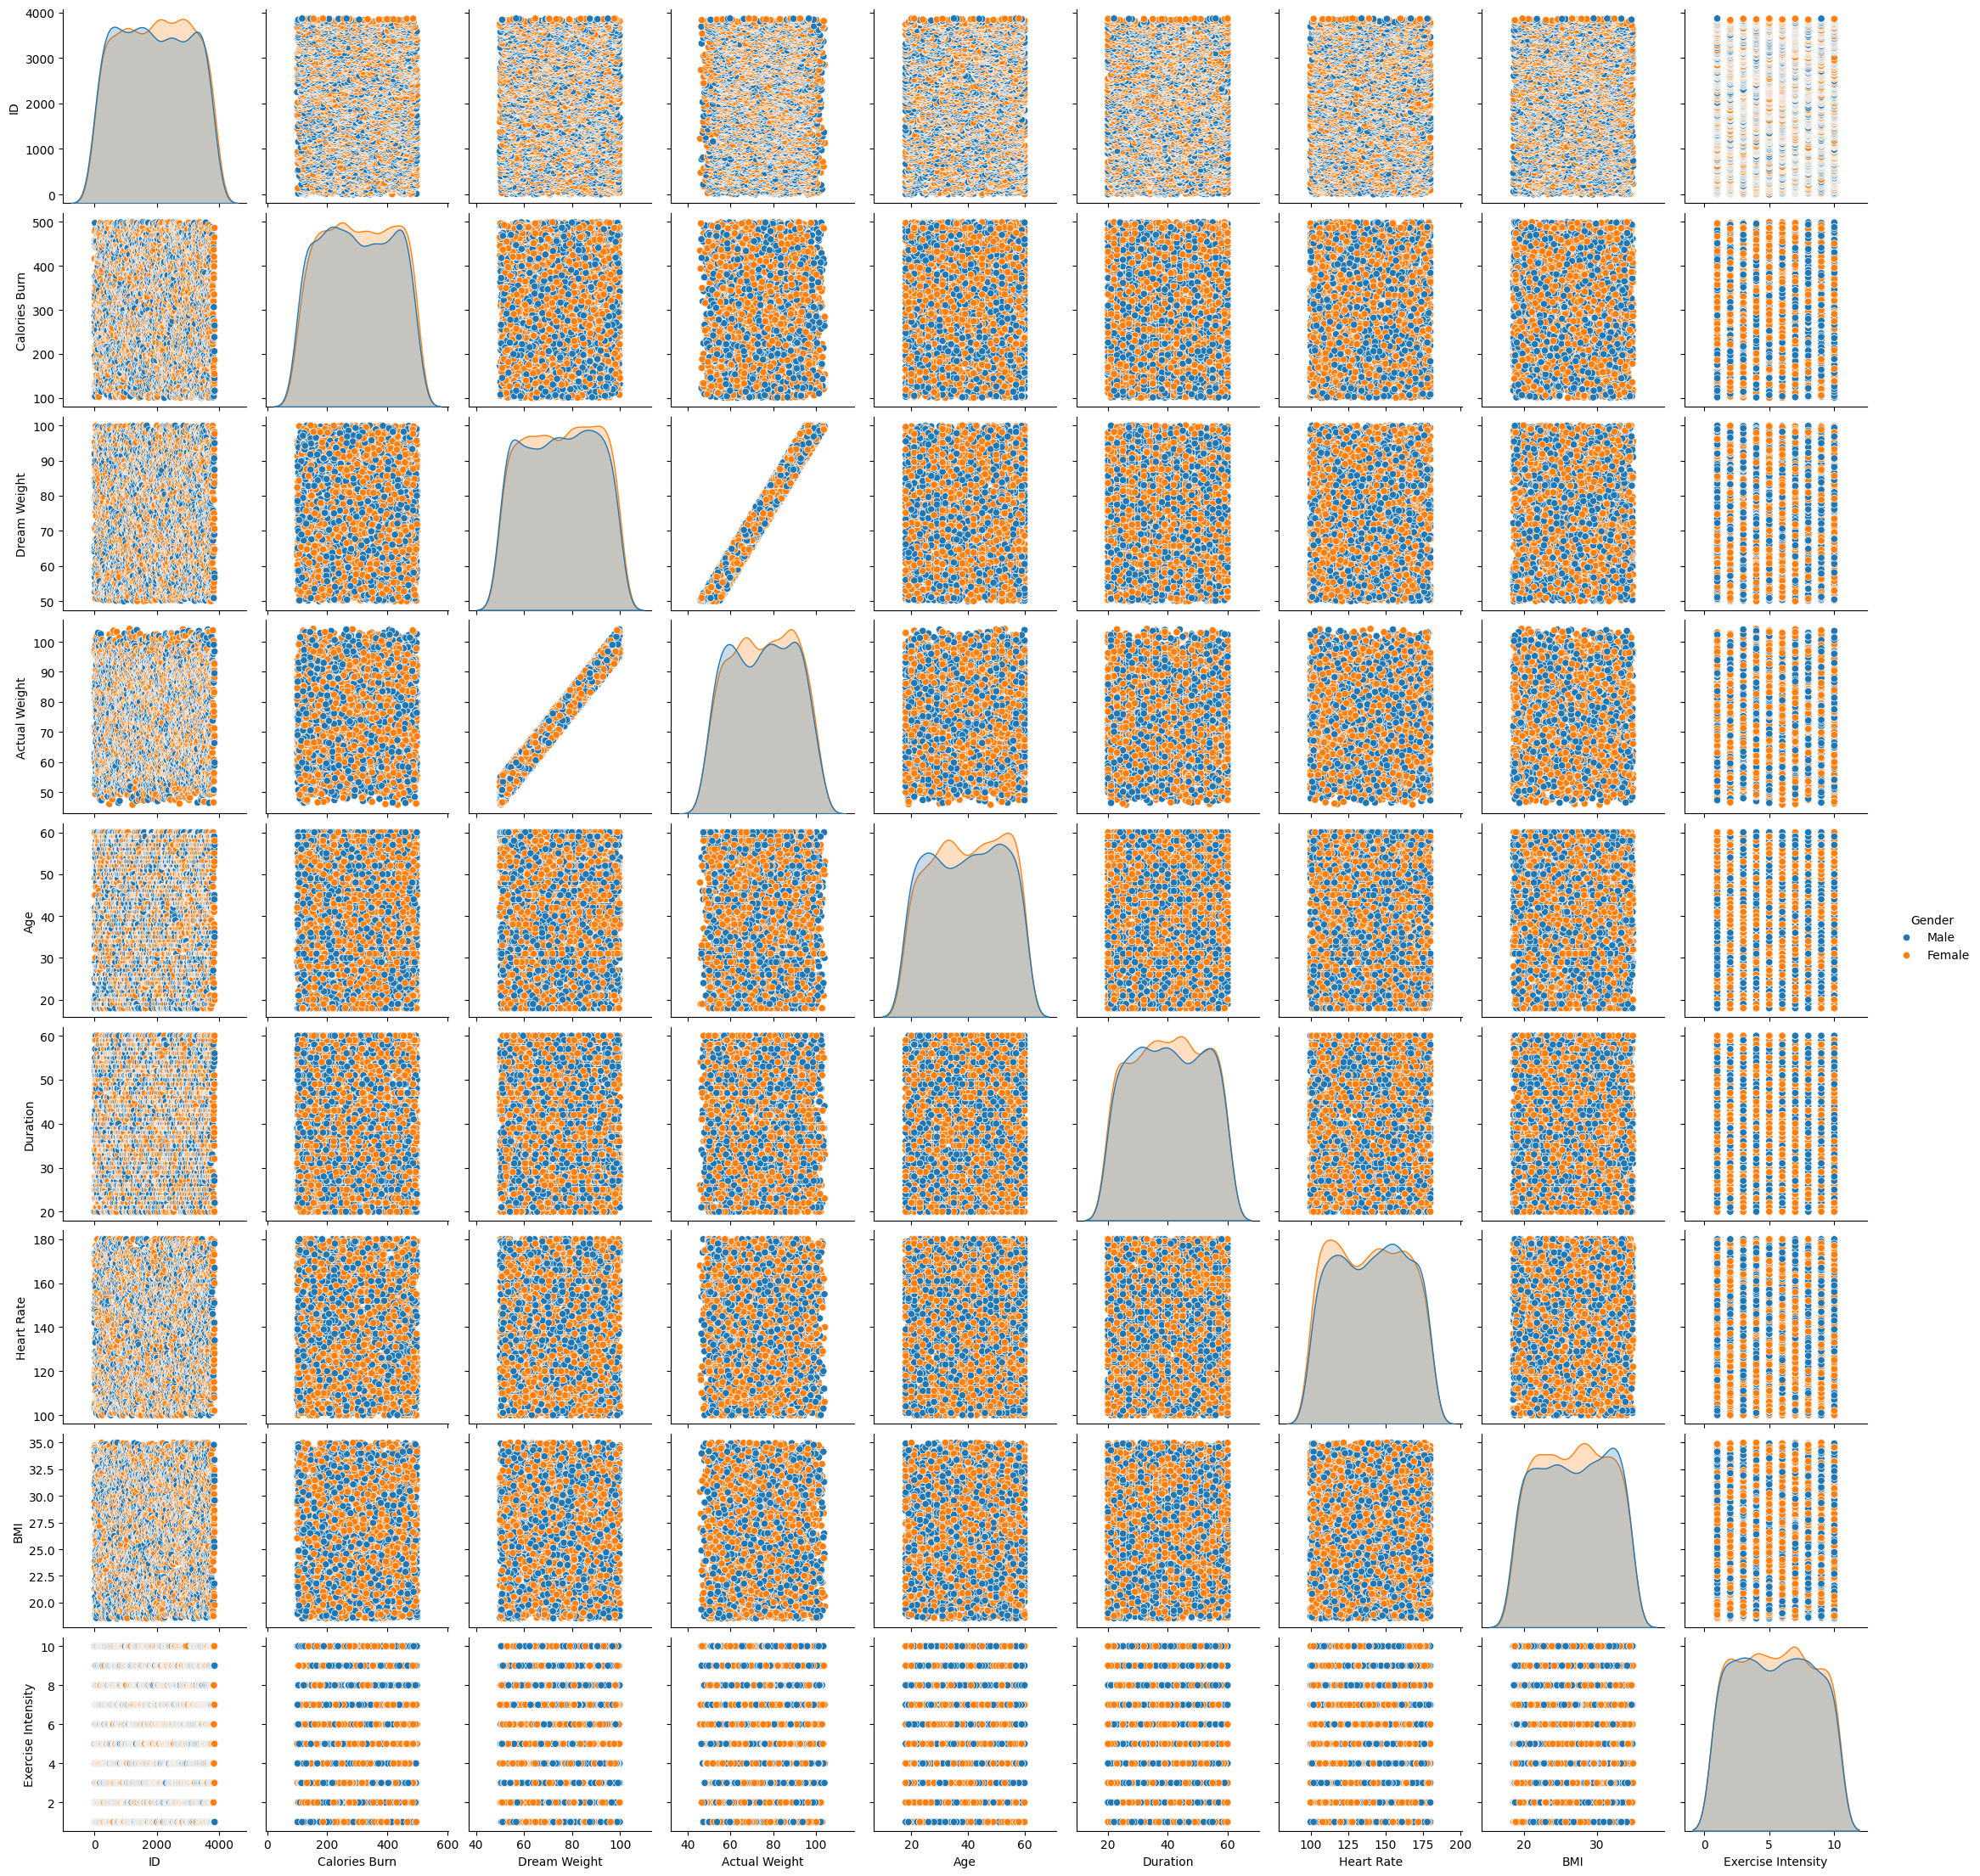

In [10]:
sns.pairplot(df, hue='Gender')

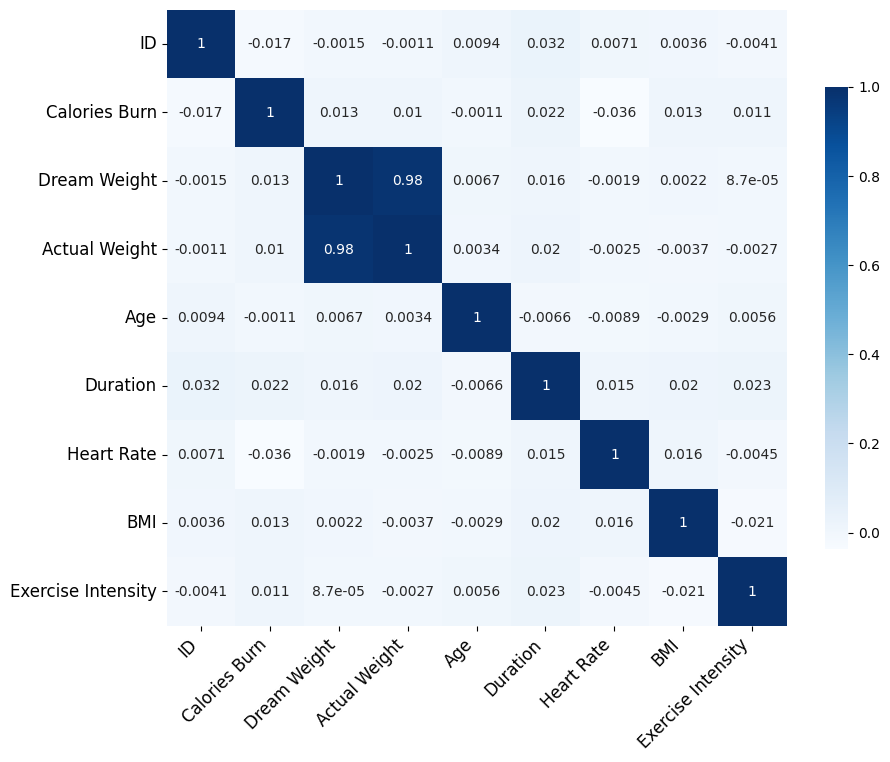

In [33]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.to_list()

cor_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))  # Adjust the width and height for better readability

# Create heatmap with customizations
sns.heatmap(cor_matrix, annot=True, cmap='Blues', annot_kws={"size": 10},  # Smaller font size for annotations
            cbar_kws={"shrink": 0.75})  # Shrink the color bar

# Rotate x and y labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Display the plot
plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   object 
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   object 
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB


<Axes: ylabel='Dream Weight'>

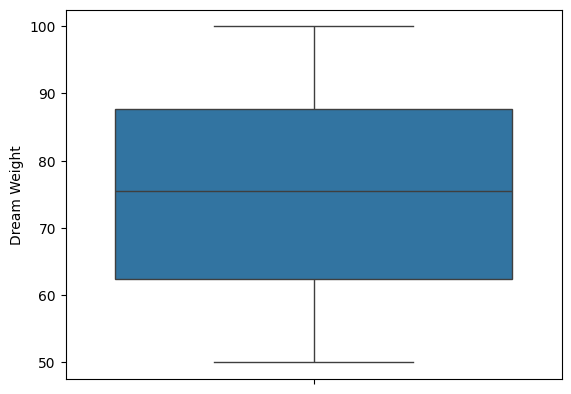

In [14]:
sns.boxplot(df,y="Dream Weight")

<Axes: xlabel='Dream Weight', ylabel='Count'>

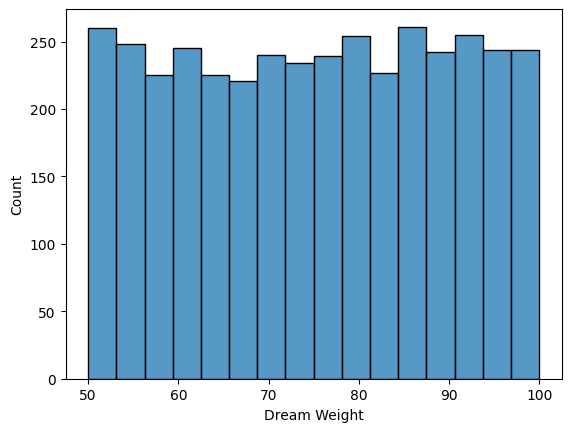

In [15]:
sns.histplot(df,x="Dream Weight")

In [17]:
# Define X and Y
# X is everything but Final score
X = df.drop('Dream Weight', axis = 1)
# Y is only Final score
Y = df['Dream Weight']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state = 42)

# Then we train our model on 70% of the information for training data

In [19]:
# Divide the numerical categories
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()


# Divide the categorical categories
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Instantiate the scaler
numerical_transformer = StandardScaler()

# Instantiate the one-hot encoder
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

In [20]:
preprocesor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(
    steps = [
        ('preprocesor', preprocesor),
        ('regresor', LinearRegression())
    ]
)

In [21]:
model.fit(X_train, Y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [22]:
print(X_train.columns)  # Verify columns in X_train


Index(['ID', 'Exercise', 'Calories Burn', 'Actual Weight', 'Age', 'Gender',
       'Duration', 'Heart Rate', 'BMI', 'Weather Conditions',
       'Exercise Intensity'],
      dtype='object')


In [23]:
print('Dream Weight' in numerical_features)  # Should return False
print('Dream Weight' in categorical_features)  # Should return False


False
False


In [24]:
print(f'''
Metrics:
RMSE: {np.sqrt(mean_squared_error(y_pred, Y_test))},
MSE: {mean_squared_error(y_pred, Y_test)}
R2: {r2_score(Y_test, y_pred)}
''')

print(f'''
      Our metrics look mostly good, speccially our R2 = {r2_score(Y_test, y_pred):.2f} which is close to 1
      and our {np.sqrt(mean_squared_error(y_pred, Y_test)):.2f} is a small number which is a good indicator
      ''')


Metrics:
RMSE: 2.795178561903957,
MSE: 7.813023192927473
R2: 0.9615948863675957


      Our metrics look mostly good, speccially our R2 = 0.96 which is close to 1
      and our 2.80 is a small number which is a good indicator
      


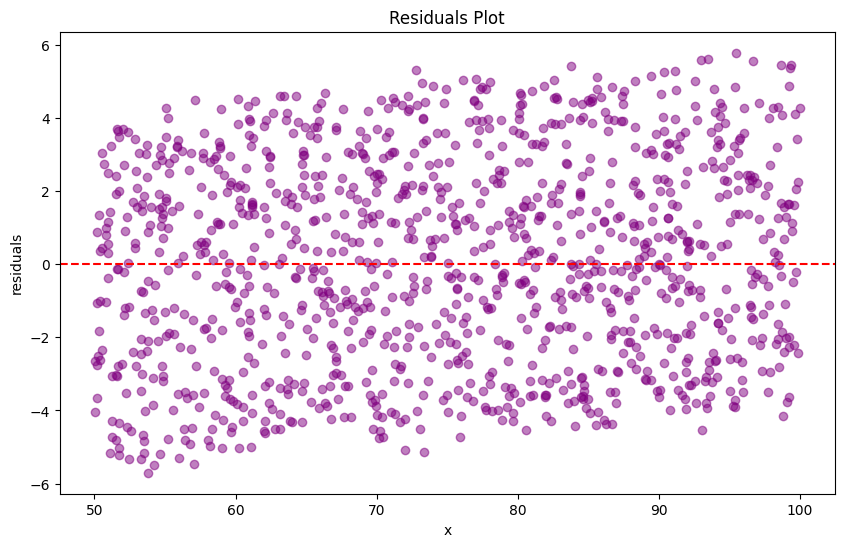

The residuals seem high density, specially on the right end, but mostly looks like a normal


In [25]:
residuals = Y_test - y_pred
residuals = residuals.values

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, residuals, color = 'purple', alpha = 0.5)
plt.axhline(y = 0, color = 'red', linestyle ='--')
plt.title('Residuals Plot')
plt.xlabel('x')
plt.ylabel('residuals')

plt.show()
print("The residuals seem high density, specially on the right end, but mostly looks like a normal")

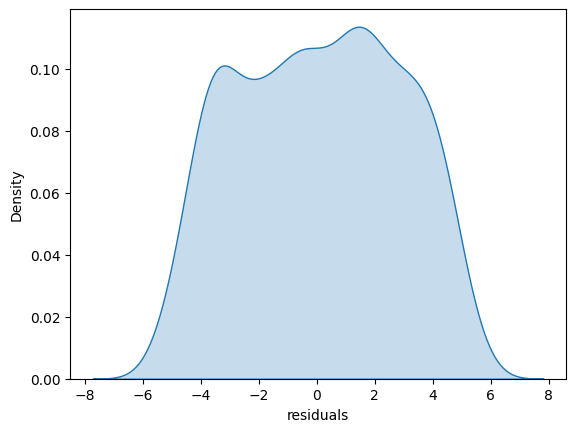

I like how our residuals perform in this graph, its very close from a normal distribution


In [26]:
res_df = pd.DataFrame({'residuals':residuals})
sns.kdeplot(res_df, x = 'residuals', fill=True)
plt.show()
print("I like how our residuals perform in this graph, its very close from a normal distribution")

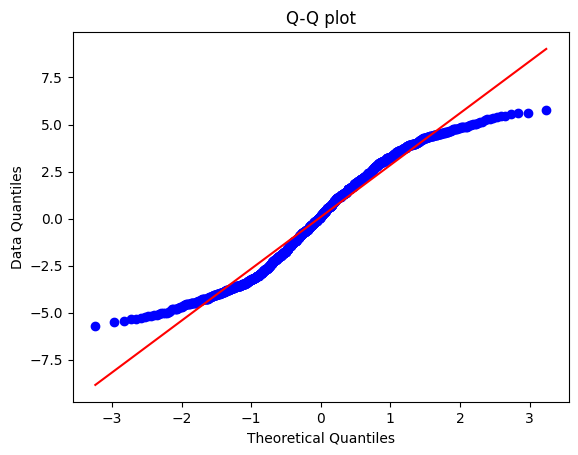

Our Q-Q plot looks pretty good, its very likely our dataset will follow a normal distribution


In [27]:
(osm, osr), (slope, intercept, r) = stats.probplot(residuals, dist='norm', plot = plt)
plt.title('Q-Q plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Data Quantiles')
plt.show()
print("Our Q-Q plot looks pretty good, its very likely our dataset will follow a normal distribution")

In [28]:
# Perform the Shapiro-Wilk test on the residuals
statistic, p_value = stats.shapiro(residuals)

# Print the test statistic
print(f'Statistic: {statistic}')
# Print the p-value from the test
print(f'p-value: {p_value}')

# Set the significance level (alpha) to 0.05
alpha = 0.05

# Check the result of the test against the significance level
if p_value <= alpha:
    # If p-value is less than or equal to 0.05, we reject the null hypothesis
    print('We reject the null hypothesis. The data does not follow a normal distribution.')
else:
    # If p-value is greater than 0.05, we fail to reject the null hypothesis
    print('We fail to reject the null hypothesis. The data might follow a normal distribution.')
    


Statistic: 0.9681426286697388
p-value: 2.8226911334293305e-15
We reject the null hypothesis. The data does not follow a normal distribution.


In [88]:
# Define the new gym-goer with all relevant variables
new_gym_goer = pd.DataFrame(
    {
        'ID': [3865],  # This is arbitrary
        'Exercise': ['Exercise 9'],  # Example exercise type
        'Calories Burn': [999],  # Example calorie burn
        'Actual Weight': [104],  # Actual weight in kg
        'Age': [60],  # Example age
        'Gender': ['Male'],  # Gender
        'Duration': [120],  # Duration of exercise in minutes
        'Heart Rate': [60],  # Heart rate during exercise
        'BMI': [34],  # Example BMI
        'Weather Conditions': ['Sunny'],  # Weather conditions
        'Exercise Intensity': [10]  # Exercise intensity on a scale
    }
)

# Use the model to predict the gym-goer's dream weight
dream_weight_pred = model.predict(new_gym_goer)

print(f"The predicted dream weight for the new gym-goer is {dream_weight_pred[0]:.2f} kg.")


The predicted dream weight for the new gym-goer is 103.82 kg.


In [87]:
df.max()

ID                          3864
Exercise              Exercise 9
Calories Burn         499.859262
Dream Weight           99.985355
Actual Weight           104.3096
Age                           60
Gender                      Male
Duration                      60
Heart Rate                   180
BMI                    34.996639
Weather Conditions         Sunny
Exercise Intensity            10
dtype: object